In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
plt.rcParams['figure.figsize'] = (14,9)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Titanic_train.csv')
df2 = pd.read_csv('/content/Titanic_test.csv')

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df2.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df2.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.shape

(891, 12)

In [ ]:
df2.shape

(418, 11)

In [ ]:
for i in df:
  print(f' the percentage of null values in {i} is the  {(df[i].isnull().sum()/df.shape[0])*100}')

 the percentage of null values in PassengerId is the  0.0
 the percentage of null values in Survived is the  0.0
 the percentage of null values in Pclass is the  0.0
 the percentage of null values in Name is the  0.0
 the percentage of null values in Sex is the  0.0
 the percentage of null values in Age is the  19.865319865319865
 the percentage of null values in SibSp is the  0.0
 the percentage of null values in Parch is the  0.0
 the percentage of null values in Ticket is the  0.0
 the percentage of null values in Fare is the  0.0
 the percentage of null values in Cabin is the  77.10437710437711
 the percentage of null values in Embarked is the  0.22446689113355783


In [ ]:
df.drop(['Ticket','Name','Cabin','PassengerId'],axis = 1,inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df.fillna(df['Age'].median(),inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.duplicated().sum()

np.int64(116)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', 28.0], dtype=object)

In [ ]:
df.loc[df['Embarked'] == 28.0, 'Embarked'] = np.nan

In [ ]:
df = df.dropna(subset=['Embarked'])

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
pipe_x = df.iloc[:,1:8]
pipe_y = df[['Survived']]

In [ ]:
data = pd.get_dummies(df, columns = ['Embarked','Sex'], drop_first = True).astype(int)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22,1,0,7,0,1,1
1,1,1,38,1,0,71,0,0,0
2,1,3,26,0,0,7,0,1,0
3,1,1,35,1,0,53,0,1,0
4,0,3,35,0,0,8,0,1,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39,0,5,29,1,0,0
887,1,1,19,0,0,30,0,1,0
888,0,3,28,1,2,23,0,1,0
889,1,1,26,0,0,30,0,0,1


<Axes: >

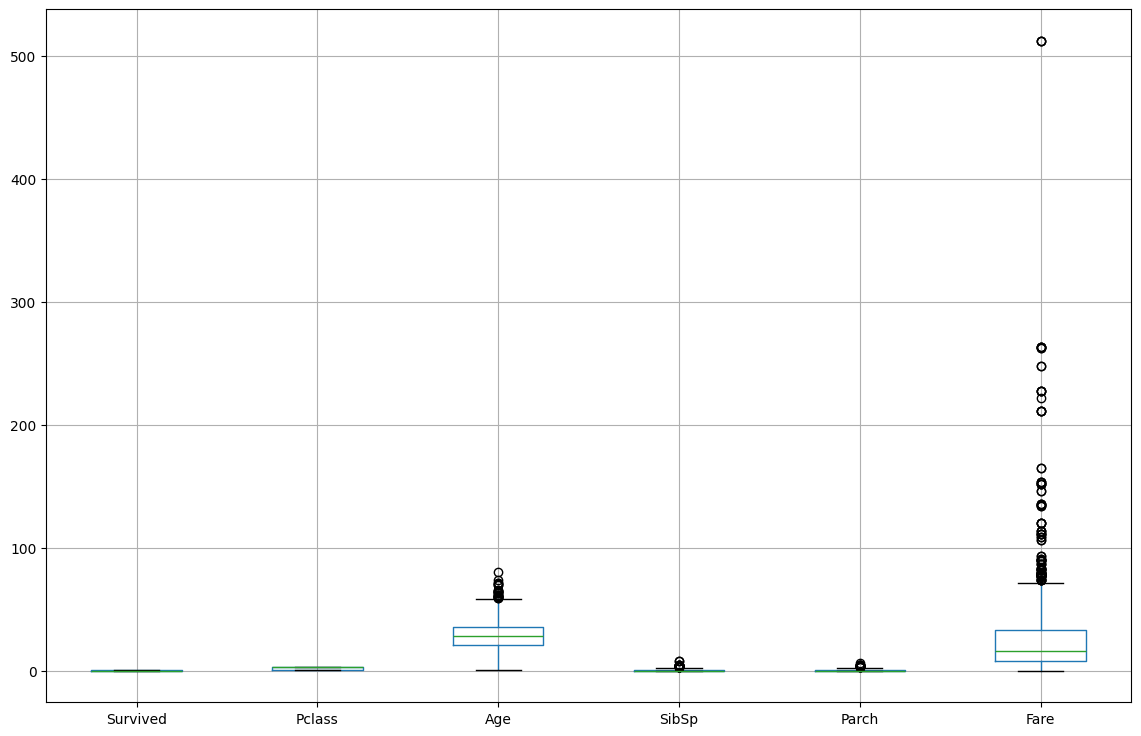

In [ ]:
df.boxplot()

<Axes: >

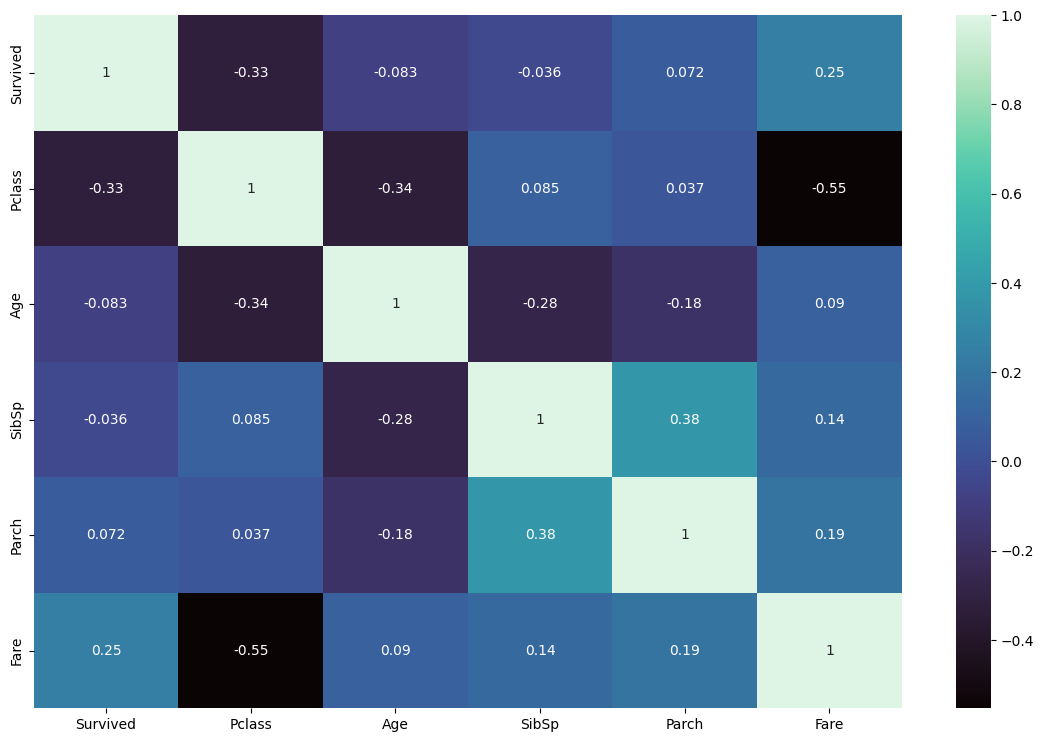

In [ ]:
df_heatmap = sns.heatmap(df.select_dtypes(include = ['float','int']).corr(), annot = True, cmap = 'mako')
df_heatmap

In [ ]:
sc = StandardScaler()
data[['Age','Fare']] = sc.fit_transform(data[['Age','Fare']])

In [ ]:
data


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,-0.547056,1,0,-0.521812,0,1,1
1,1,1,0.618288,1,0,0.699510,0,0,0
2,1,3,-0.255720,0,0,-0.521812,0,1,0
3,1,1,0.399786,1,0,0.356013,0,1,0
4,0,3,0.399786,0,0,-0.502729,0,1,1
...,...,...,...,...,...,...,...,...,...
885,0,3,0.691122,0,5,-0.101983,1,0,0
887,1,1,-0.765558,0,0,-0.082899,0,1,0
888,0,3,-0.110052,1,2,-0.216482,0,1,0
889,1,1,-0.255720,0,0,-0.082899,0,0,1


In [ ]:
a = data.iloc[:,1:9]
b = data[['Survived']]
c = b.values.ravel()

In [ ]:
logr = LogisticRegression()
logr.fit(a,b)

LogisticRegression()

In [ ]:
print(f'Training Accuracy: {logr.score(a,b)}')

Training Accuracy: 0.7736093143596378


In [ ]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df2.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
for i in df2.columns:
    print(f'The Null value percentage of {i} is: {(df2[i].isnull().sum()/df2.shape[0]) * 100}')

The Null value percentage of PassengerId is: 0.0
The Null value percentage of Pclass is: 0.0
The Null value percentage of Name is: 0.0
The Null value percentage of Sex is: 0.0
The Null value percentage of Age is: 20.574162679425836
The Null value percentage of SibSp is: 0.0
The Null value percentage of Parch is: 0.0
The Null value percentage of Ticket is: 0.0
The Null value percentage of Fare is: 0.23923444976076555
The Null value percentage of Cabin is: 78.22966507177034
The Null value percentage of Embarked is: 0.0


In [ ]:
df2.drop(['Ticket','Name','Cabin','PassengerId'],axis = 1,inplace = True)
df2


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


<Axes: >

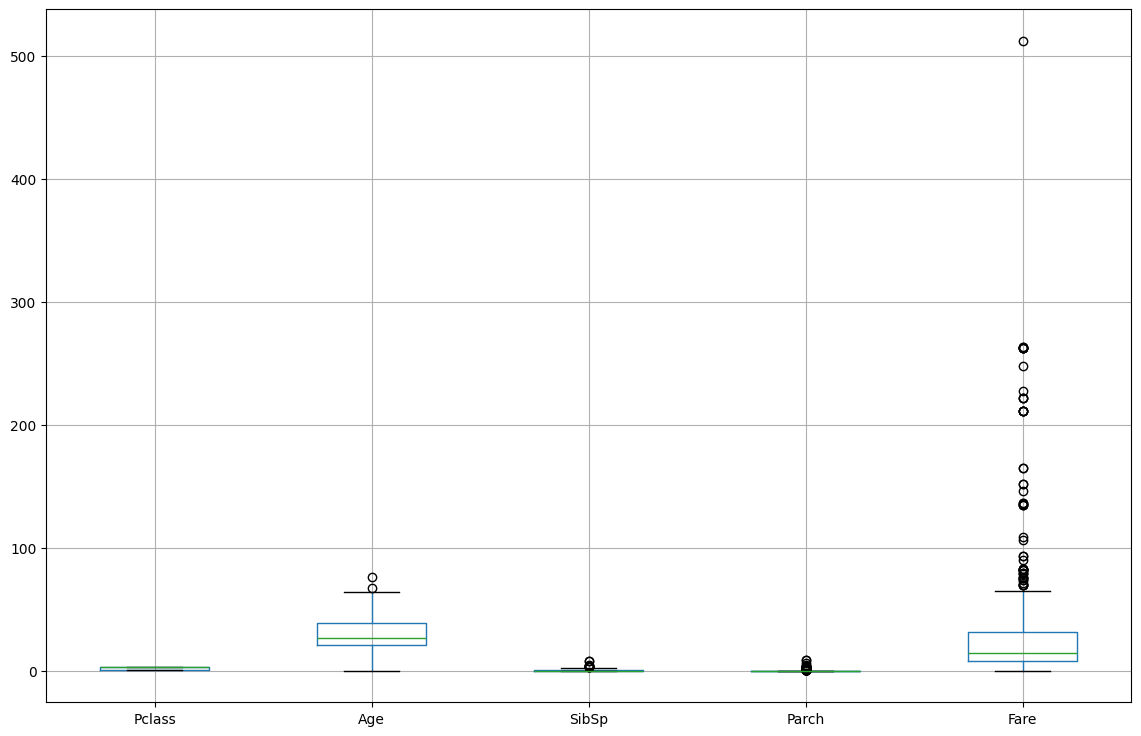

In [ ]:
df2.boxplot()

In [ ]:
df2['Age'] = df2['Age'].fillna(df2['Age'].median())
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [ ]:
df2.dropna(inplace = True)

In [ ]:
for i in df2.columns:
    print(f'The Null value of percentage is {i} is: {(df2[i].isnull().sum()/df2.shape[0]) * 100}')

The Null value of percentage is Pclass is: 0.0
The Null value of percentage is Sex is: 0.0
The Null value of percentage is Age is: 0.0
The Null value of percentage is SibSp is: 0.0
The Null value of percentage is Parch is: 0.0
The Null value of percentage is Fare is: 0.0
The Null value of percentage is Embarked is: 0.0


In [ ]:
df2[['Age','Fare']] = sc.transform(df2[['Age','Fare']])
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.363369,0,0,-0.505989,Q
1,3,female,1.273795,1,0,-0.521812,S
2,2,male,2.366305,0,0,-0.470526,Q
3,3,male,-0.182886,0,0,-0.490087,S
4,3,female,-0.547056,1,1,-0.420910,S
...,...,...,...,...,...,...,...
413,3,male,-0.182886,0,0,-0.501775,S
414,1,female,0.691122,0,0,1.422763,C
415,3,male,0.654705,0,0,-0.517042,S
416,3,male,-0.182886,0,0,-0.501775,S


In [ ]:
df3 = pd.get_dummies(df2, columns = ['Embarked','Sex'], drop_first = True).astype(int)
df3

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,0,0,0,0,1,0,1
1,3,1,1,0,0,0,1,0
2,2,2,0,0,0,1,0,1
3,3,0,0,0,0,0,1,1
4,3,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
413,3,0,0,0,0,0,1,1
414,1,0,0,0,1,0,0,0
415,3,0,0,0,0,0,1,1
416,3,0,0,0,0,0,1,1


In [ ]:
b_pred = logr.predict(df3)
b_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
y_pred = pd.DataFrame(b_pred)
y_pred

,0
0,0
1,0
2,0
3,0
4,1
...,...
412,0
413,1
414,0
415,0


In [ ]:
df2[['Age','Fare']] = sc.inverse_transform(df2[['Age','Fare']]).astype(int)
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34,0,0,7,Q
1,3,female,47,1,0,7,S
2,2,male,62,0,0,9,Q
3,3,male,27,0,0,8,S
4,3,female,22,1,1,12,S
...,...,...,...,...,...,...,...
413,3,male,27,0,0,8,S
414,1,female,39,0,0,108,C
415,3,male,38,0,0,7,S
416,3,male,27,0,0,8,S


In [ ]:
df2 = df2.reset_index(drop = True)
df2['Survived'] = pd.DataFrame(b_pred)
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34,0,0,7,Q,0
1,3,female,47,1,0,7,S,0
2,2,male,62,0,0,9,Q,0
3,3,male,27,0,0,8,S,0
4,3,female,22,1,1,12,S,1
...,...,...,...,...,...,...,...,...
412,3,male,27,0,0,8,S,0
413,1,female,39,0,0,108,C,1
414,3,male,38,0,0,7,S,0
415,3,male,27,0,0,8,S,0


In [ ]:
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34,0,0,7,Q,0
1,3,female,47,1,0,7,S,0
2,2,male,62,0,0,9,Q,0
3,3,male,27,0,0,8,S,0
4,3,female,22,1,1,12,S,1
...,...,...,...,...,...,...,...,...
412,3,male,27,0,0,8,S,0
413,1,female,39,0,0,108,C,1
414,3,male,38,0,0,7,S,0
415,3,male,27,0,0,8,S,0


In [ ]:
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Age', 'Fare']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)

titanic_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

In [ ]:
titanic_pipeline.fit(pipe_x, pipe_y.values.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [ ]:
print(titanic_pipeline.score(pipe_x, pipe_y.values.ravel()))

0.7736093143596378


Deployment link : https://data-science-projects-uneanq89xrudgxjm8cofj4.streamlit.app/

Interview Questions:**bold text**

1). What is the difference between precision and recall?

Ans-> 1. Precision:
It tells us how many of the predicted positive results are actually correct.
➤ Focus: Accuracy of positive predictions.

2. Recall:
It tells us how many of the actual positive cases we were able to correctly detect.
➤ Focus: Finding all real positives.

3. Formula of Precision:
Precision = TP / (TP + FP)
(TP = True Positives, FP = False Positives)

4. Formula of Recall:
Recall = TP / (TP + FN)
(FN = False Negatives)

5. When to focus on Precision:
When false positives are costly (e.g. predicting a person has a disease when they don’t).

6. When to focus on Recall:
When missing actual positives is risky (e.g. detecting cancer – better to catch all real cases).

7. Example:
   Imagine a spam filter:

   High Precision: Only spam emails are marked spam (no good emails marked).

   High Recall: All spam emails are caught (even if some good emails are wrongly marked).



2) . What is cross-validation, and why is it important in binary classification?

Ans-> 1) Cross-validation is a model evaluation technique.

2) It splits data into training and testing parts multiple times.

3) Common method: K-Fold Cross-Validation.

4) It helps to check model performance on unseen data.

5) Reduces overfitting by testing on different data splits.

6) Gives a more reliable accuracy for binary classification.

7) Ensures model is not biased to one dataset split.

8) Useful when data is limited or imbalanced.

9) Helps in choosing the best model or parameters.